In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/vince/Downloads/bank_marketing_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary statistics of the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

# Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# Copying the dataset to avoid changes to the original dataframe
data_preprocessed = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Columns to encode
categorical_columns = data_preprocessed.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('subscribed')  # We'll handle the target variable separately

# Encoding categorical features
for column in categorical_columns:
    data_preprocessed[column] = data_preprocessed[column].replace('unknown', None)  # Replace 'unknown' with NaN
    data_preprocessed[column] = le.fit_transform(data_preprocessed[column].astype(str))  # Encode

# Encoding target variable
data_preprocessed['subscribed'] = le.fit_transform(data_preprocessed['subscribed'])

# Check the head of the dataframe and the handling of 'unknown' values
data_preprocessed.head(), data_preprocessed.isnull().sum()


(   age  job  marital  education  default  housing  loan  contact  month  \
 0   56    4        2          1        1        1     1        1      6   
 1   57    8        2          4        0        1     1        1      6   
 2   37    8        2          4        1        2     1        1      6   
 3   40    1        2          2        1        1     1        1      6   
 4   56    8        2          4        1        1     2        1      6   
 
    day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
 0            1  ...         1    999         0         1           1.1   
 1            1  ...         1    999         0         1           1.1   
 2            1  ...         1    999         0         1           1.1   
 3            1  ...         1    999         0         1           1.1   
 4            1  ...         1    999         0         1           1.1   
 
    cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
 0          93.994

In [3]:
# Checking the distribution of the target variable 'subscribed'
subscription_counts = data_preprocessed['subscribed'].value_counts(normalize=True)
subscription_counts


subscribed
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [4]:
# Dropping the specified columns: 'duration', 'poutcome', and 'day_of_week'
data_preprocessed = data_preprocessed.drop(['duration', 'poutcome', 'day_of_week'], axis=1)

# Display the updated DataFrame to confirm the changes
data_preprocessed.head()


,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,4,2,1,1,1,1,1,6,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,4,0,1,1,1,6,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,4,1,2,1,1,6,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,2,1,1,1,1,6,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,4,1,1,2,1,6,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to scale (all numeric columns except the target variable)
numeric_columns = data_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [6]:
numeric_columns

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

# Upsampling

In [7]:
from sklearn.utils import resample

# Separate the majority and minority classes
data_majority = data_preprocessed[data_preprocessed.subscribed == 0]
data_minority = data_preprocessed[data_preprocessed.subscribed == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
data_balanced['subscribed'].value_counts()


subscribed
0    36548
1    36548
Name: count, dtype: int64

data_balanced=data_preprocessed.copy()

In [8]:
import pandas as pd
# Create a copy of the data_balanced dataset
dataset1 = data_balanced.copy()

# Print the first few rows of dataset1
print(dataset1.head())


   age  job  marital  education  default  housing  loan  contact  month  \
0   56    4        2          1        1        1     1        1      6   
1   57    8        2          4        0        1     1        1      6   
2   37    8        2          4        1        2     1        1      6   
3   40    1        2          2        1        1     1        1      6   
4   56    8        2          4        1        1     2        1      6   

   campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0         1    999         0           1.1          93.994          -36.4   
1         1    999         0           1.1          93.994          -36.4   
2         1    999         0           1.1          93.994          -36.4   
3         1    999         0           1.1          93.994          -36.4   
4         1    999         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  subscribed  
0      4.857       5191.0           0  
1     

In [9]:
# Applying standard scaling
data_balanced[numeric_columns] = scaler.fit_transform(data_balanced[numeric_columns])

# Display the scaled dataframe to confirm the changes
data_balanced.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,1.305973,4,2,1,1,1,1,1,6,-0.56714,0.356658,-0.447954,0.924539,0.814609,0.71345,1.000075,0.636166,0
1,1.389478,8,2,4,0,1,1,1,6,-0.56714,0.356658,-0.447954,0.924539,0.814609,0.71345,1.000075,0.636166,0
2,-0.280637,8,2,4,1,2,1,1,6,-0.56714,0.356658,-0.447954,0.924539,0.814609,0.71345,1.000075,0.636166,0
3,-0.030120,1,2,2,1,1,1,1,6,-0.56714,0.356658,-0.447954,0.924539,0.814609,0.71345,1.000075,0.636166,0
4,1.305973,8,2,4,1,1,2,1,6,-0.56714,0.356658,-0.447954,0.924539,0.814609,0.71345,1.000075,0.636166,0


# Logistical Regression for Reference

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
X_balanced = data_balanced.drop('subscribed', axis=1)
y_balanced = data_balanced['subscribed']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Coefficients
coefficients = pd.DataFrame(log_reg.coef_.T, index=X_balanced.columns, columns=['Coefficient'])

coefficients


,Coefficient
age,0.022245
job,0.001747
marital,0.086465
education,0.019966
default,0.245529
housing,-0.003014
loan,0.026635
contact,-0.819916
month,-0.113898
campaign,-0.075533


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7344049247606019
Precision: 0.7884057971014493
Recall: 0.6363886595100468
F1 Score: 0.7042875637803669
Confusion Matrix:
 [[6113 1241]
 [2642 4624]]


# Causal Inference

In [12]:
import econml
from econml.dml import DML, LinearDML, SparseLinearDML, CausalForestDML
from econml.orf import DMLOrthoForest
import numpy as np
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from econml.sklearn_extensions.linear_model import WeightedLassoCVWrapper, WeightedLasso, WeightedLassoCV
from sklearn.linear_model import LassoCV

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [13]:
from sklearn.ensemble import GradientBoostingClassifier


In [14]:
W = data_balanced[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']]
T = dataset1[['campaign']]
Y = data_balanced['subscribed']
X = data_balanced[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']]

In [15]:
# First split: Separating out the test set
Y_train_val, Y_test, T_train_val, T_test, X_train_val, X_test, W_train_val, W_test = train_test_split(
    Y, T, X, W, test_size=0.2, random_state=123)

# Second split: Splitting the remaining data into training and validation sets
Y_train, Y_val, T_train, T_val, X_train, X_val, W_train, W_val = train_test_split(
    Y_train_val, T_train_val, X_train_val, W_train_val, test_size=0.25, random_state=123) # 0.25 * 0.8 = 0.2

In [16]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier


## Casual Forest

In [18]:
est = CausalForestDML(model_y=LassoCV(),
                       model_t=LassoCV(),
                       criterion='mse', n_estimators=1000,
                       min_impurity_decrease=0.001,
                       random_state=123)
est.fit(Y_train, T_train, X=X_train, W=W_train)
te_pred = est.effect(X_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [19]:
# Calculate the confidence interval using percentiles
lower_bound = np.percentile(te_pred, 2.5)
upper_bound = np.percentile(te_pred, 97.5)
avg_effect = est.ate(X)
# Print effect
print(f"Mean effect of treatment:{avg_effect}")
print("Effect Interval (95% confidence): [{}, {}]".format(lower_bound, upper_bound))

Mean effect of treatment:-0.4570250545589949
Effect Interval (95% confidence): [-7.763336960680115, 3.0636902506915096]


In [20]:
import shap

In [21]:
shap_values = est.shap_values(X)

100%|===================| 72947/73096 [06:56<00:00]        

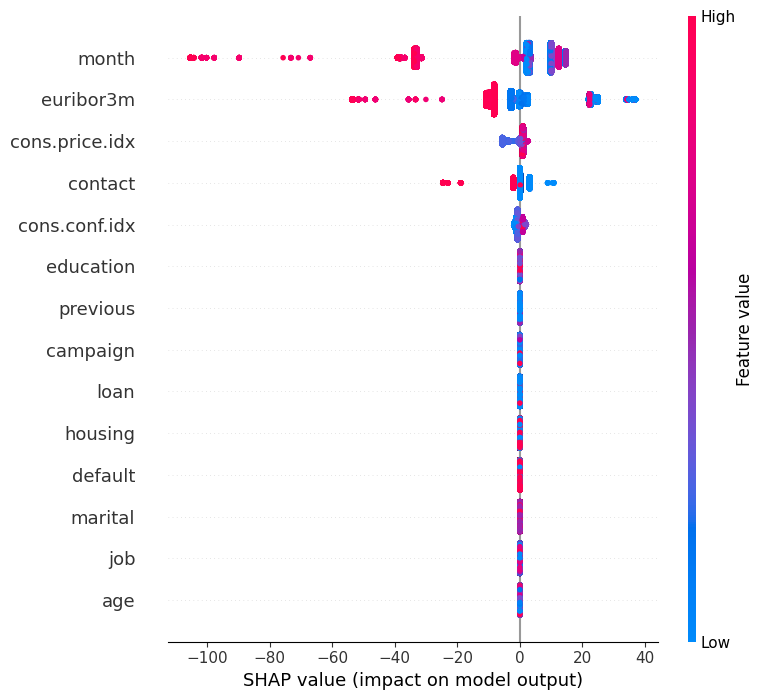

In [22]:

# convert dict_keys object to a list to make it subscriptable
output_name = list(shap_values.keys())[0] 
treatment_name = list(shap_values[output_name].keys())[0] 

specific_shap_values = shap_values[output_name][treatment_name]


# visualize the SHAP values
shap.summary_plot(specific_shap_values, X)

In [23]:
te_pred

array([-3.01898531,  2.21298198, -5.48490567, ...,  1.33286768,
        3.06369025, -5.48490567])

## Linear DML

In [33]:
est2 = LinearDML(model_y=Lasso(),
                model_t=Lasso(),
                random_state=123)
est2.fit(Y_train, T_train, X=X_train, W=W_train)
te_pred2 = est2.effect(X_test)

In [34]:
# Calculate the confidence interval using percentiles
lower_bound2 = np.percentile(te_pred2, 2.5)
upper_bound2 = np.percentile(te_pred2, 97.5)
avg_effect2 = est2.ate(X)
# Print effect
print(f"Mean effect of treatment:{avg_effect2}")
print("Effect Interval (95% confidence): [{}, {}]".format(lower_bound2, upper_bound2))

Mean effect of treatment:-0.11177706194436228
Effect Interval (95% confidence): [-0.39451191779663985, 0.009259832710705082]
